In [10]:
from qiskit import *
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal
from qiskit.visualization import plot_histogram


In [26]:
#Create quantum circuit
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure(range(3), range(3))

In [27]:
#Transpile the cicuit 
backend = Aer.get_backend ('qasm_simulator')
transpiled_qc = transpile(qc, backend)

In [28]:
#Simulate the circuit
job = backend.run(assemble(transpiled_qc, shots=1000))
counts = job.result().get_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_8040\1595813000.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(assemble(transpiled_qc, shots=1000))


In [29]:
# Perform error mitigation
cal_circuits, state_labels = complete_meas_cal(qubit_list=range(3))
cal_results = backend.run(assemble(cal_circuits, backend=backend)).result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_counts = meas_fitter.filter.apply(counts)

C:\Users\HP\AppData\Local\Temp\ipykernel_8040\1558199295.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_results = backend.run(assemble(cal_circuits, backend=backend)).result()


In [30]:
# Print the original and mitigated counts
print("Original counts:", counts)
print("Mitigated counts:", mitigated_counts)

Original counts: {'111': 512, '000': 488}
Mitigated counts: {'000': 487.99999999392946, '001': 1.981858176175248e-09, '010': 2.0101730263520834e-09, '011': 2.0085969572345027e-09, '100': 2.0083372723295136e-09, '101': 2.009018132665393e-09, '110': 2.007906462852332e-09, '111': 511.99999999404446}


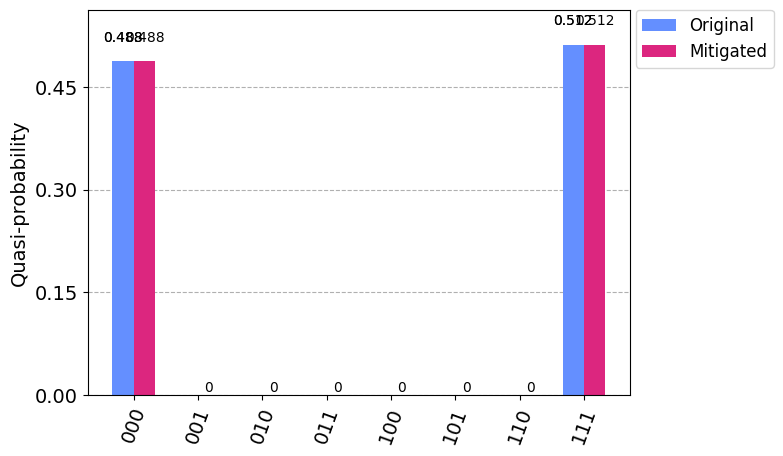

In [31]:
# Plot histograms
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])